In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
#Loading Dataset
data=pd.read_csv("C:/Recent Download/train.csv")
data_test=pd.read_csv("C:/Recent Download/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Recent Download/train.csv'

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.shape

(550068, 12)

In [6]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [7]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [8]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [9]:

#Missing values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

THERE ARE A LOT OF MISSING VALUES IN PRODUCT CATEGORY 2&3

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
#converting float value into int
data1={'Product_Category_2':int,'Product_Category_3':int}

In [12]:
data=data.fillna(0).astype(data1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB


In [14]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [15]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

There are no missing values

In [16]:
data=data.drop('User_ID',axis=1)

In [17]:
data=data.drop('Product_ID',axis=1)

In [18]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [19]:
data=data.rename({'Product_Category_1':'P1','Product_Category_2':'P2','Product_Category_3':'P3'},axis=1)

In [20]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,P1,P2,P3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [21]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [22]:
data.describe()

,Occupation,Marital_Status,P1,P2,P3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [23]:
data['P2'].mean()

6.735436346051761

In [24]:
data['P3'].mean()

3.841941359977312

In [25]:
data['P2']=data['P2'].replace(0,7)

In [26]:
data['P3']=data['P3'].replace(0,4)

In [27]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,P1,P2,P3,Purchase
0,F,0-17,10,A,2,0,3,7,4,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,7,4,1422
3,F,0-17,10,A,2,0,12,14,4,1057
4,M,55+,16,C,4+,0,8,7,4,7969


In [28]:
data.describe()

,Occupation,Marital_Status,P1,P2,P3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,8.945101,6.628848,9263.968713
std,6.522660,0.491770,3.936211,4.410354,4.586708,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,7.000000,4.000000,5823.000000
50%,7.000000,0.000000,5.000000,7.000000,4.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'P1', 'P2', 'P3',
       'Purchase'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   P1                          550068 non-null  int64 
 7   P2                          550068 non-null  int32 
 8   P3                          550068 non-null  int32 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(4), object(4)
memory usage: 37.8+ MB


In [31]:
data=data.drop('Stay_In_Current_City_Years',axis=1)

<AxesSubplot:>

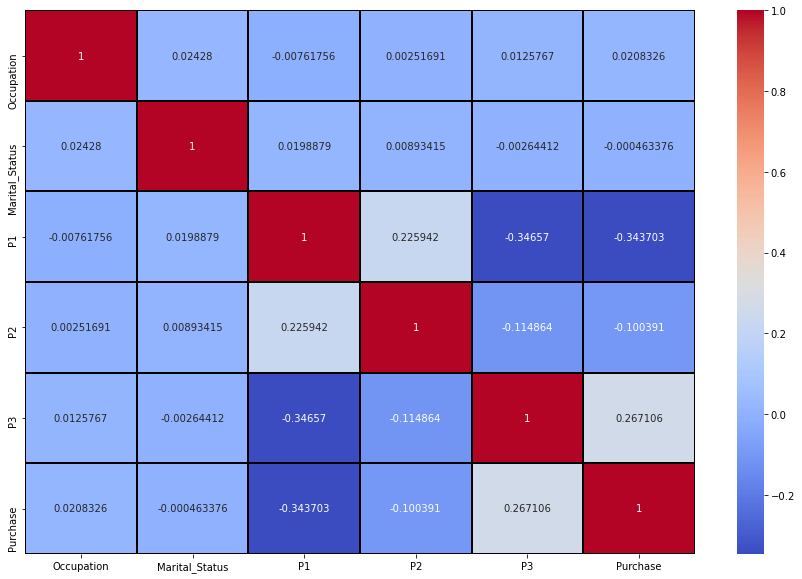

In [32]:
#Correlation
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='g',linewidths=1,linecolor='black')

In [1]:
#Count plot
plt.figure(figsize=(15,7))
sns.countplot(x='Purchase',hue='Gender',data=data)

NameError: name 'plt' is not defined

Acc to the graph more amount of procducts have been purchased by Males

<AxesSubplot:xlabel='Age', ylabel='count'>

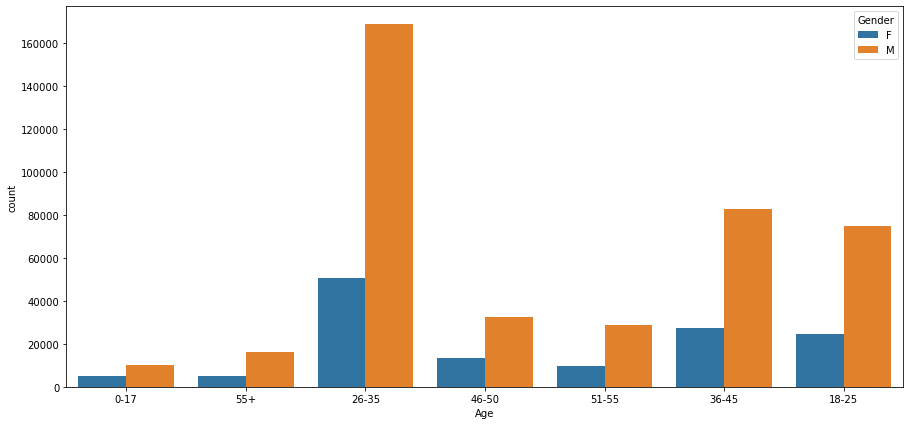

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age',hue='Gender',data=data)

 Age group 26-35 males visits the shop for purchasing.

In [35]:
data=pd.get_dummies(data,drop_first=True)

In [36]:
data

,Occupation,Marital_Status,P1,P2,P3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,10,0,3,7,4,8370,0,0,0,0,0,0,0,0,0
1,10,0,1,6,14,15200,0,0,0,0,0,0,0,0,0
2,10,0,12,7,4,1422,0,0,0,0,0,0,0,0,0
3,10,0,12,14,4,1057,0,0,0,0,0,0,0,0,0
4,16,0,8,7,4,7969,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,7,4,368,1,0,0,0,0,1,0,1,0
550064,1,0,20,7,4,371,0,0,1,0,0,0,0,0,1
550065,15,1,20,7,4,137,0,0,1,0,0,0,0,1,0
550066,1,0,20,7,4,365,0,0,0,0,0,0,1,0,1


In [39]:
data.columns

Index(['Occupation', 'Marital_Status', 'P1', 'P2', 'P3', 'Purchase',
       'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [40]:
columns=(['Occupation', 'Marital_Status', 'P1', 'P2', 'P3', 'Purchase',
       'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C'])

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d,columns=columns)
scaled_df.head()

,Occupation,Marital_Status,P1,P2,P3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.5,0.0,0.105263,0.3125,0.066667,0.348992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.000000,0.2500,0.733333,0.634181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.578947,0.3125,0.066667,0.058875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.578947,0.7500,0.066667,0.043634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.0,0.368421,0.3125,0.066667,0.332248,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [44]:
x=data.drop('Purchase',axis=1)
y=data.Purchase


In [45]:
x.shape

(550068, 14)

In [46]:
y.shape

(550068,)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [51]:
log = pd.DataFrame(columns=["model", "accuracy"])

In [57]:
from sklearn import metrics

In [53]:
#Building Model 1.DECISION TREE
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)


DecisionTreeRegressor()

In [56]:
train_pred1 = model1.predict(x_train)
train_pred1


array([ 5034.5       , 13335.49579832,  7522.60326087, ...,
        6052.34110787,  5626.83333333, 14800.51219512])

In [58]:
RSQscore1 = metrics.r2_score(y_train,train_pred1)

In [59]:
print("R squared error for Decision Tree Regressor:",RSQscore1)

R squared error for Decision Tree Regressor: 0.744018874190293


In [62]:
test_pred1 = model1.predict(x_test)
test_pred1


array([12863.15517241,  6183.5       ,  7808.17346939, ...,
        7103.43188406, 15018.83333333,  6299.61538462])

In [64]:
RSQscore1 = metrics.r2_score(y_test,test_pred1)
print("R squared error for Decision Tree Regressor:",RSQscore1)

R squared error for Decision Tree Regressor: 0.59964519812684


In [65]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [67]:
train_pred2 = model2.predict(x_train)
train_pred2

array([ 7353.58566253, 13077.1704573 ,  8356.2460226 , ...,
        8645.86677517,  8583.11194451, 10627.86974567])

In [68]:
RSQscore2 = metrics.r2_score(y_train,train_pred2)
print("R squared error for Linear Regressor:",RSQscore2) 


R squared error for Linear Regressor: 0.1492192998854791


In [70]:
test_pred2 = model2.predict(x_test)
test_pred2

array([10614.90264115,  8123.72630535,  7332.23653531, ...,
        8002.25809337, 12808.7023146 ,  8819.99433569])

In [71]:
RSQscore2 = metrics.r2_score(y_test,test_pred2)
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.14892779405789802


In [72]:
from xgboost import XGBRegressor
model3= XGBRegressor()
model3.fit(x_train,y_train)

XGBoostError: 
XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['[WinError 1455] The paging file is too small for this operation to complete']
